# IBM HR Analytics Employee Attrition & Performance

***

# Lib's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Dataset

In [2]:
df_raw = pd.read_csv('dataset.csv', sep = ',', encoding = 'latin-1')
df_raw.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
# validation data
df_validation = df_raw.sample(frac = 0.20)

# split df and validation data
df_raw = df_raw[~df_raw.index.isin(df_validation.index)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Data Type

In [3]:
# shape
df_raw.shape

(1470, 35)

In [4]:
# data types
df_raw.dtypes

ï»¿Age                       int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# rename first column (ï»¿Age)
df_raw.rename(columns = {'ï»¿Age' : 'Age'}, inplace = True)

df_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Null Values

In [6]:
df_raw.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Visualizing dataset
df_raw.sample(5).T

,870,902,742,1095,661
Age,35,27,50,33,43
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1361,1167,804,589,177
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,17,4,9,28,8
Education,4,2,3,4,3
EducationField,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences
EmployeeCount,1,1,1,1,1
EmployeeNumber,1218,1259,1030,1549,920


## Data Dimensions

In [8]:
df1 = df_raw.copy()

As we can see, this dataset has 35 different features, so, in order to see how data is distributed in each attribute, we gonna check each percentage.

In [9]:
cols = df1.columns

def value_counts():
    for d in df1[cols]:
        print((df1[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
value_counts()

35    5.306122
34    5.238095
36    4.693878
31    4.693878
29    4.625850
32    4.149660
30    4.081633
33    3.945578
38    3.945578
40    3.877551
37    3.401361
27    3.265306
28    3.265306
42    3.129252
39    2.857143
45    2.789116
41    2.721088
26    2.653061
44    2.244898
46    2.244898
43    2.176871
50    2.040816
25    1.768707
24    1.768707
49    1.632653
47    1.632653
55    1.496599
51    1.292517
53    1.292517
48    1.292517
54    1.224490
52    1.224490
22    1.088435
56    0.952381
23    0.952381
58    0.952381
21    0.884354
20    0.748299
59    0.680272
19    0.612245
18    0.544218
60    0.340136
57    0.272109
Name: Age, dtype: float64
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64
691     0.408163
530     0.340136
1329    0.340136
1082    0.340136
329     0.340136
          ...   
1439    0.068027
1369    0.0680

In [10]:
# dropping features Over18 and StandardHours
df1.drop(columns=(['Over18', 'StandardHours', 'EmployeeCount']), inplace = True)

# Descriptive Analysis

## Dependent Variable

In [11]:
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

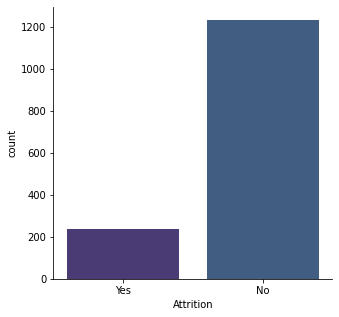

In [12]:
sns.set_palette("viridis")

plt.figure(figsize = (5,5))
sns.countplot(data = df1, x = 'Attrition')
sns.despine();

## Numerical Variables

In [13]:
# Selecting numerical variables
num_variables = df1.select_dtypes(include = ['int64', 'float64'])
num_variables.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [14]:
# add Attrition variable
num_variables = num_variables.merge(df1['Attrition'], left_index = True, right_index = True)

<ipython-input-15-b2c3321098c1>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


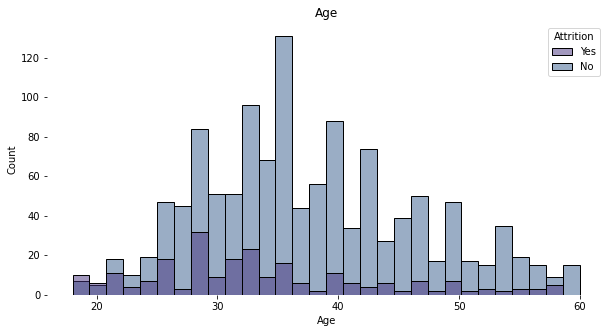

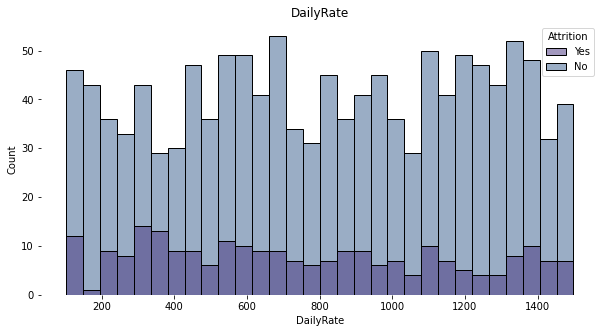

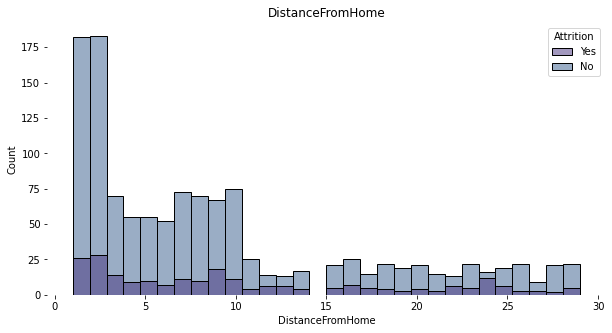

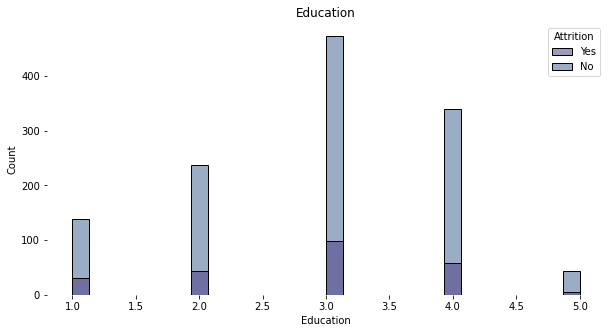

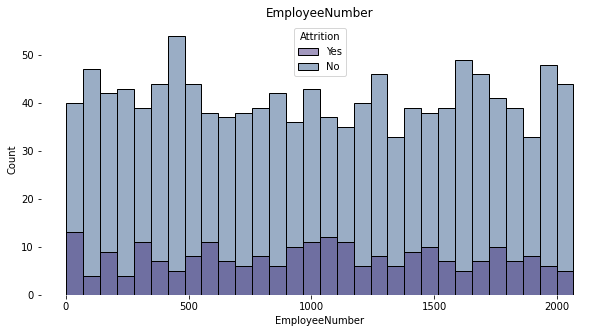

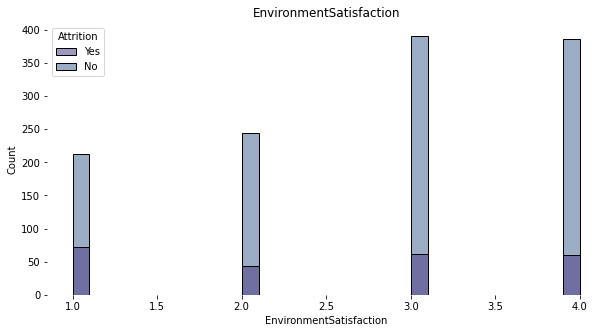

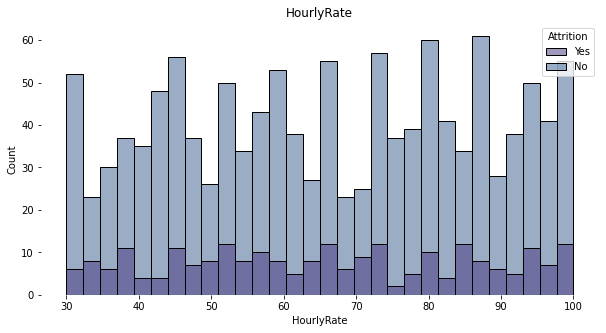

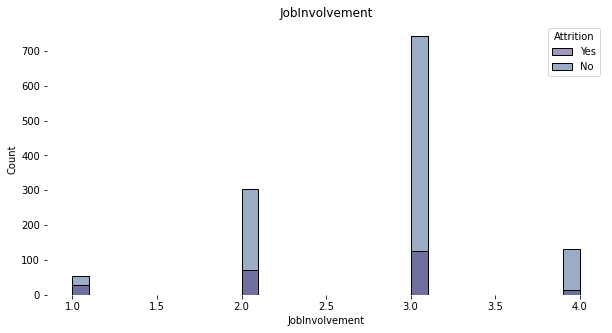

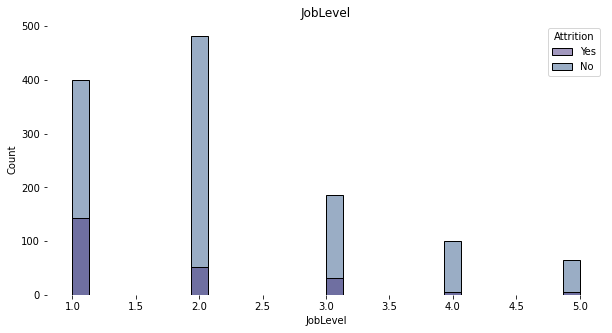

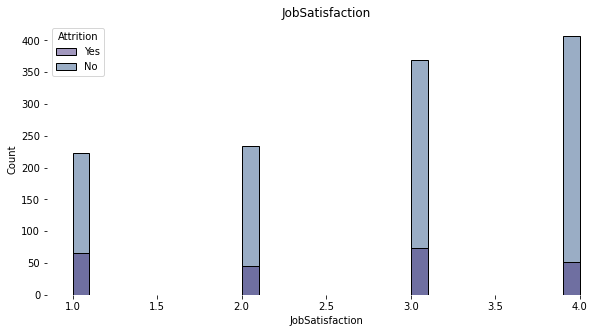

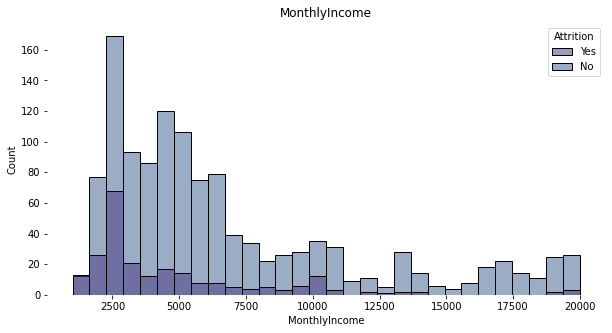

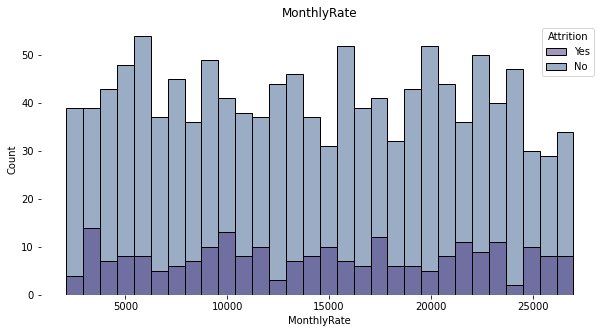

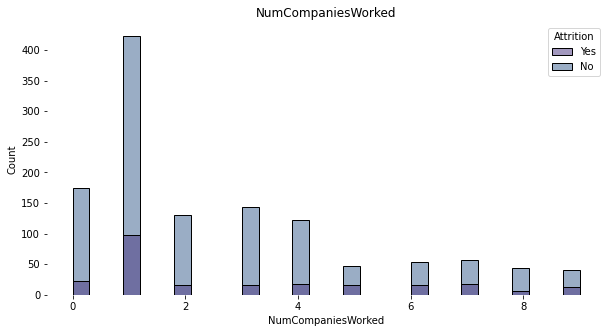

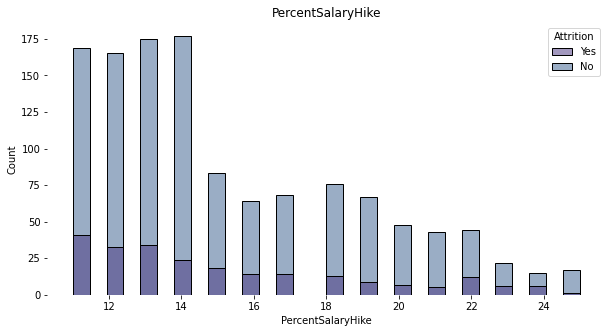

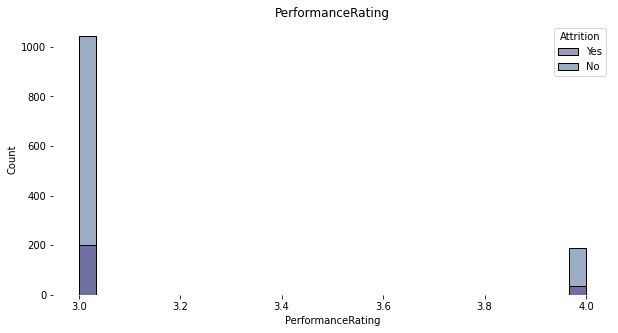

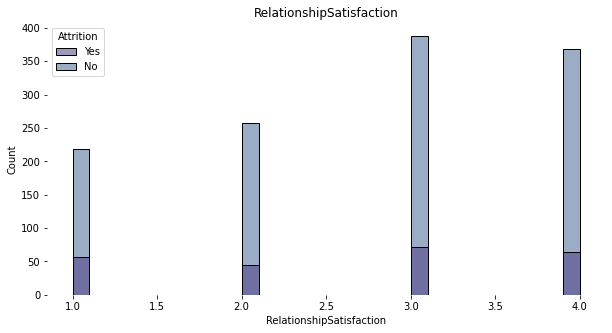

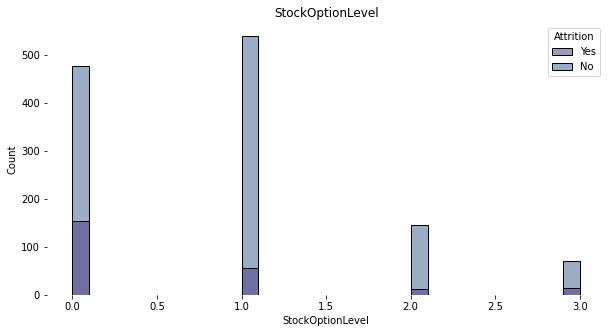

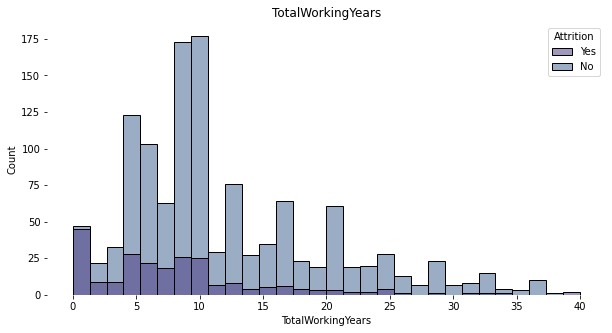

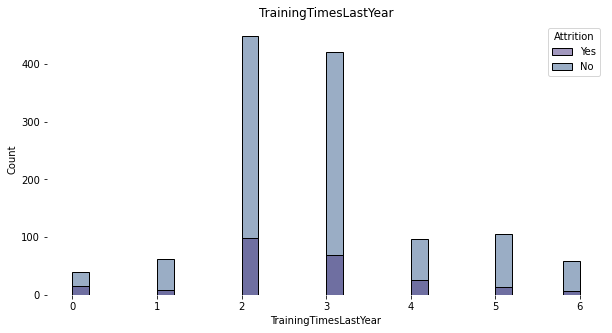

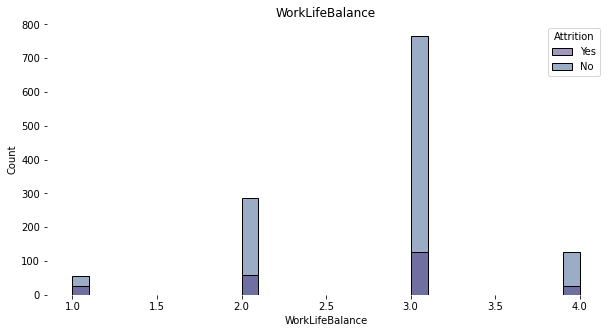

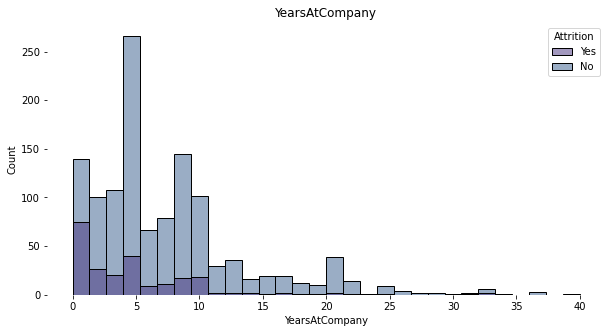

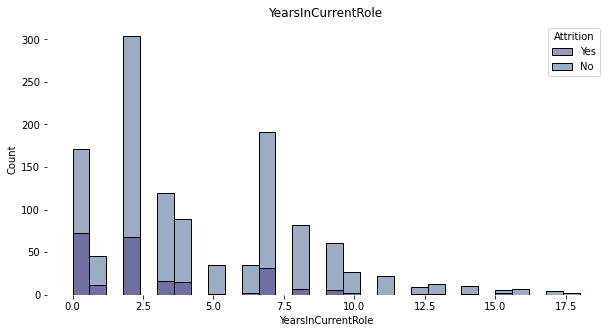

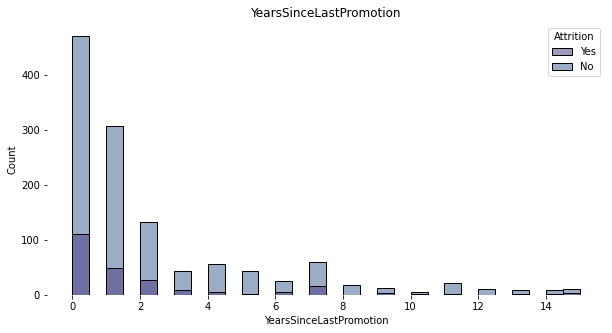

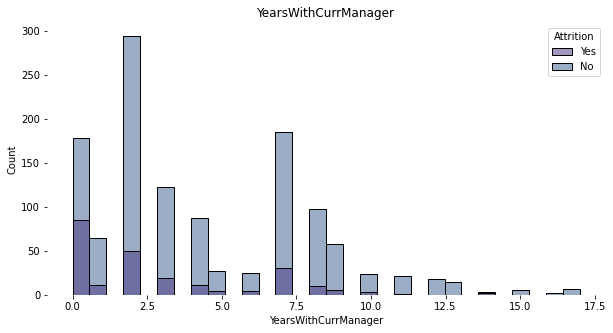

In [15]:
for n in num_variables.columns:
    if n != 'Attrition':
        sns.set_palette('viridis')

        plt.figure(figsize = (10, 5))
        sns.histplot(data = df1, x = n, hue = 'Attrition', bins = 30)
        sns.despine(bottom = True, left = True)
        plt.title(n)

***

**1. Age:**

Younger people, specially before 30 years old, quit job more often.

**2. Distance from Home**

There's many employees who live near from company's office who quit their job.


**3. Education:**

Employees with Bachelor degree tend to quit job more offen (based on absolute values. Need to analyze the percetage of this attribute)

**4. Job Level:**

Job level categorized in number one concentrate the major number of attritions.

**5. Monthly Income :**

Employees who have lower income tend to quit their jobs more often.

**6. Number of Companies Worked:**

People who had worked in only one company before tend to quit their currently job.

**7. Total Working Years**
Newer employees and people with few year experience quit job more ofeten.


***


In [16]:
num_variables1 = num_variables.drop(columns=(['Attrition']))

# Central Tendency
ct1 = pd.DataFrame(num_variables1.apply(np.mean)).T
ct2 = pd.DataFrame(num_variables1.apply(np.median)).T

# Dispersion
d1 = pd.DataFrame(num_variables1.apply(np.std)).T
d2 = pd.DataFrame(num_variables1.apply(min)).T
d3 = pd.DataFrame(num_variables1.apply(max)).T
d4 = pd.DataFrame(num_variables1.apply(lambda x: x.max() - x.min())).T

#concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attribute', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attribute,mean,median,std,min,max,range
0,Age,36.923810,36.0,9.132266,18.0,60.0,42.0
1,DailyRate,802.485714,802.0,403.371829,102.0,1499.0,1397.0
2,DistanceFromHome,9.192517,7.0,8.104107,1.0,29.0,28.0
3,Education,2.912925,3.0,1.023817,1.0,5.0,4.0
4,EmployeeNumber,1024.865306,1020.5,601.819530,1.0,2068.0,2067.0
5,EnvironmentSatisfaction,2.721769,3.0,1.092710,1.0,4.0,3.0
6,HourlyRate,65.891156,66.0,20.322512,30.0,100.0,70.0
7,JobInvolvement,2.729932,3.0,0.711319,1.0,4.0,3.0
8,JobLevel,2.063946,2.0,1.106563,1.0,5.0,4.0
9,JobSatisfaction,2.728571,3.0,1.102471,1.0,4.0,3.0


### AGE

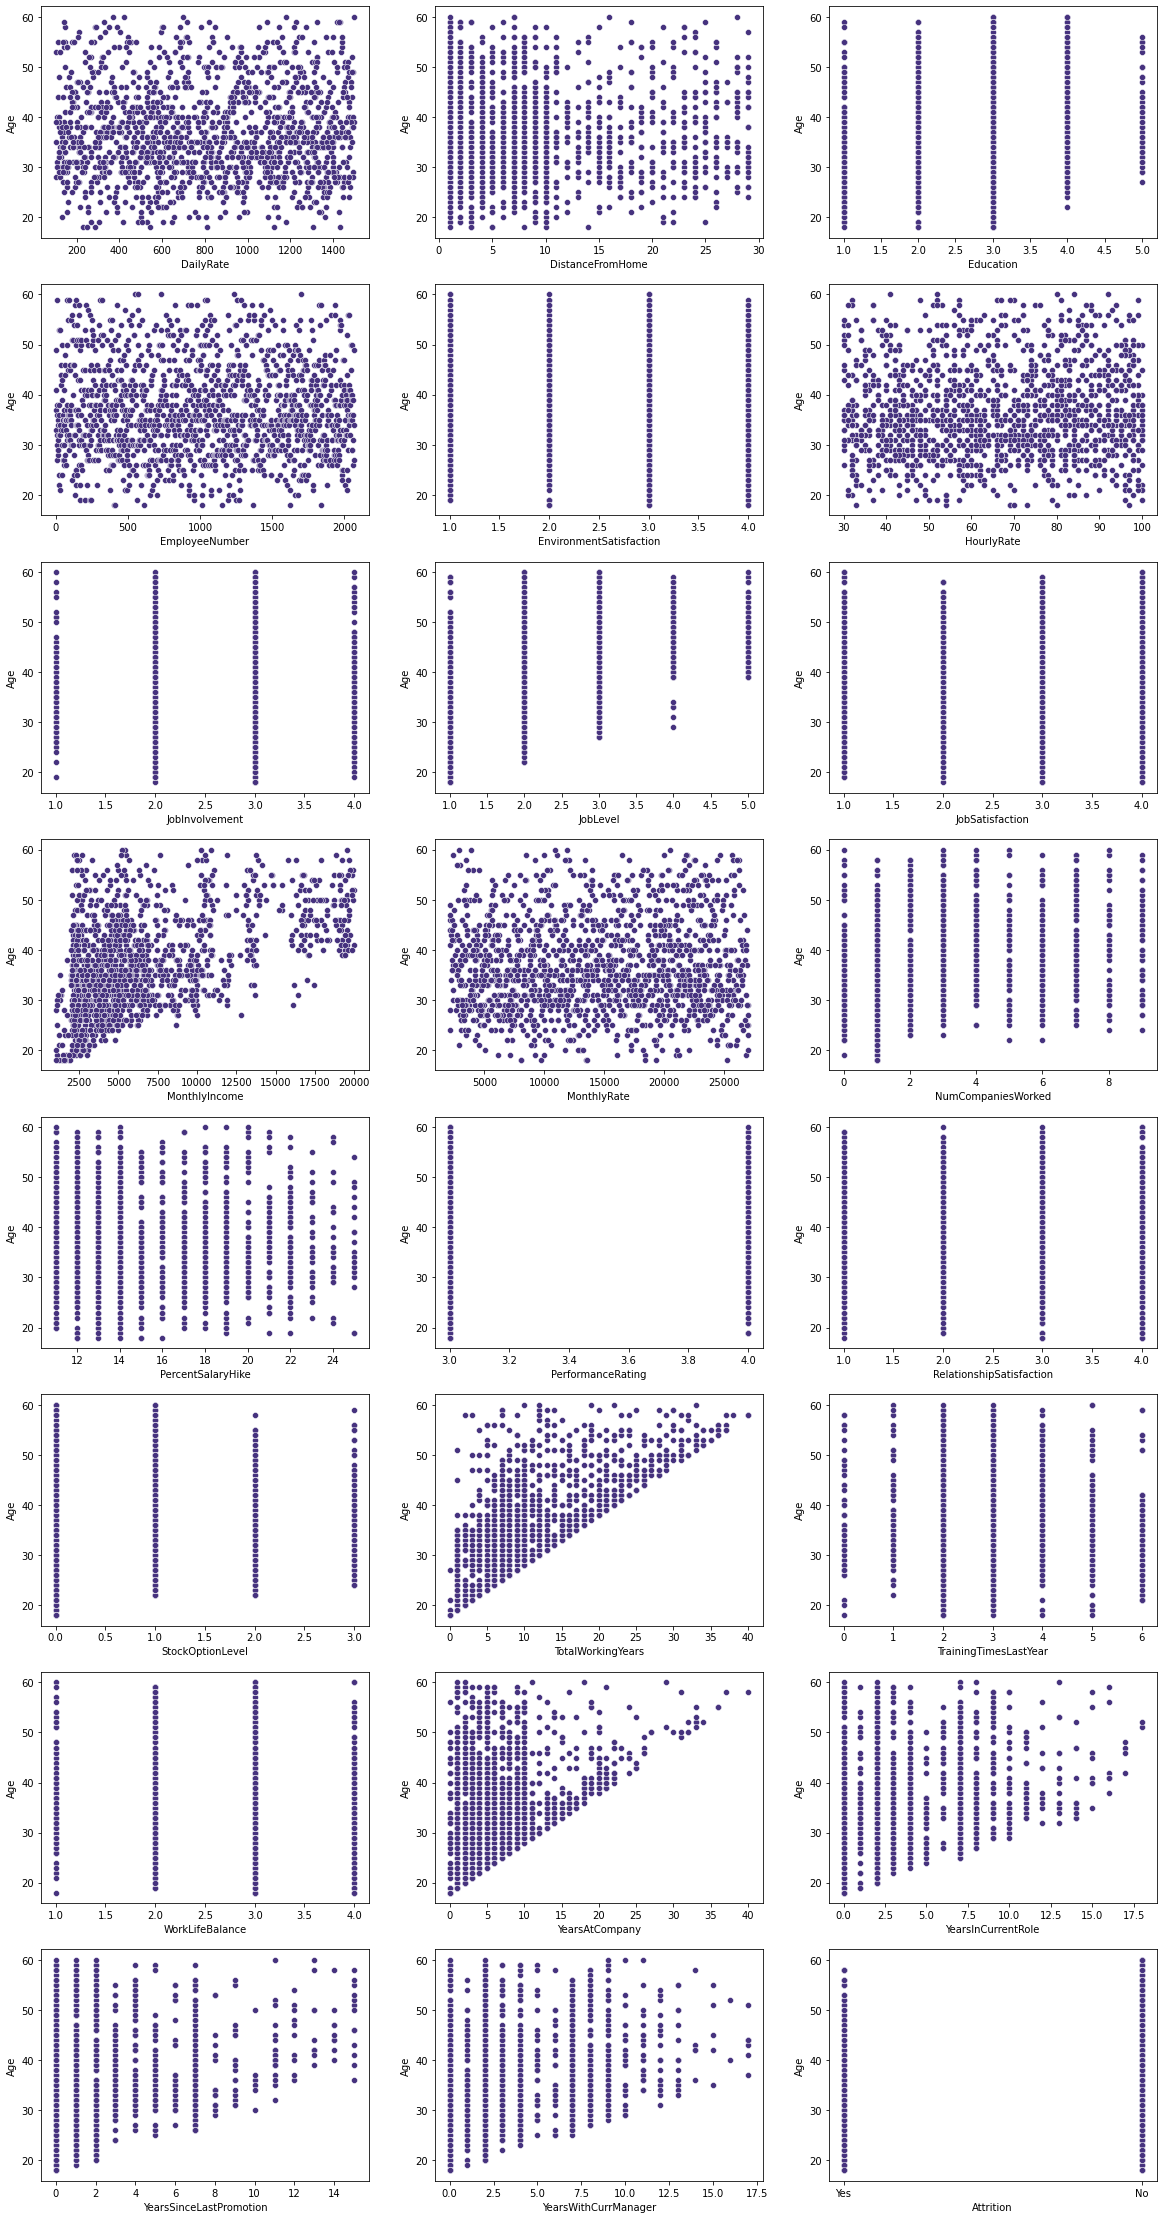

In [17]:
plt.figure(figsize = (20,40))
x = 1

for d in num_variables:
    if d != 'Age':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'Age')
        x += 1

### DistanceFromHome

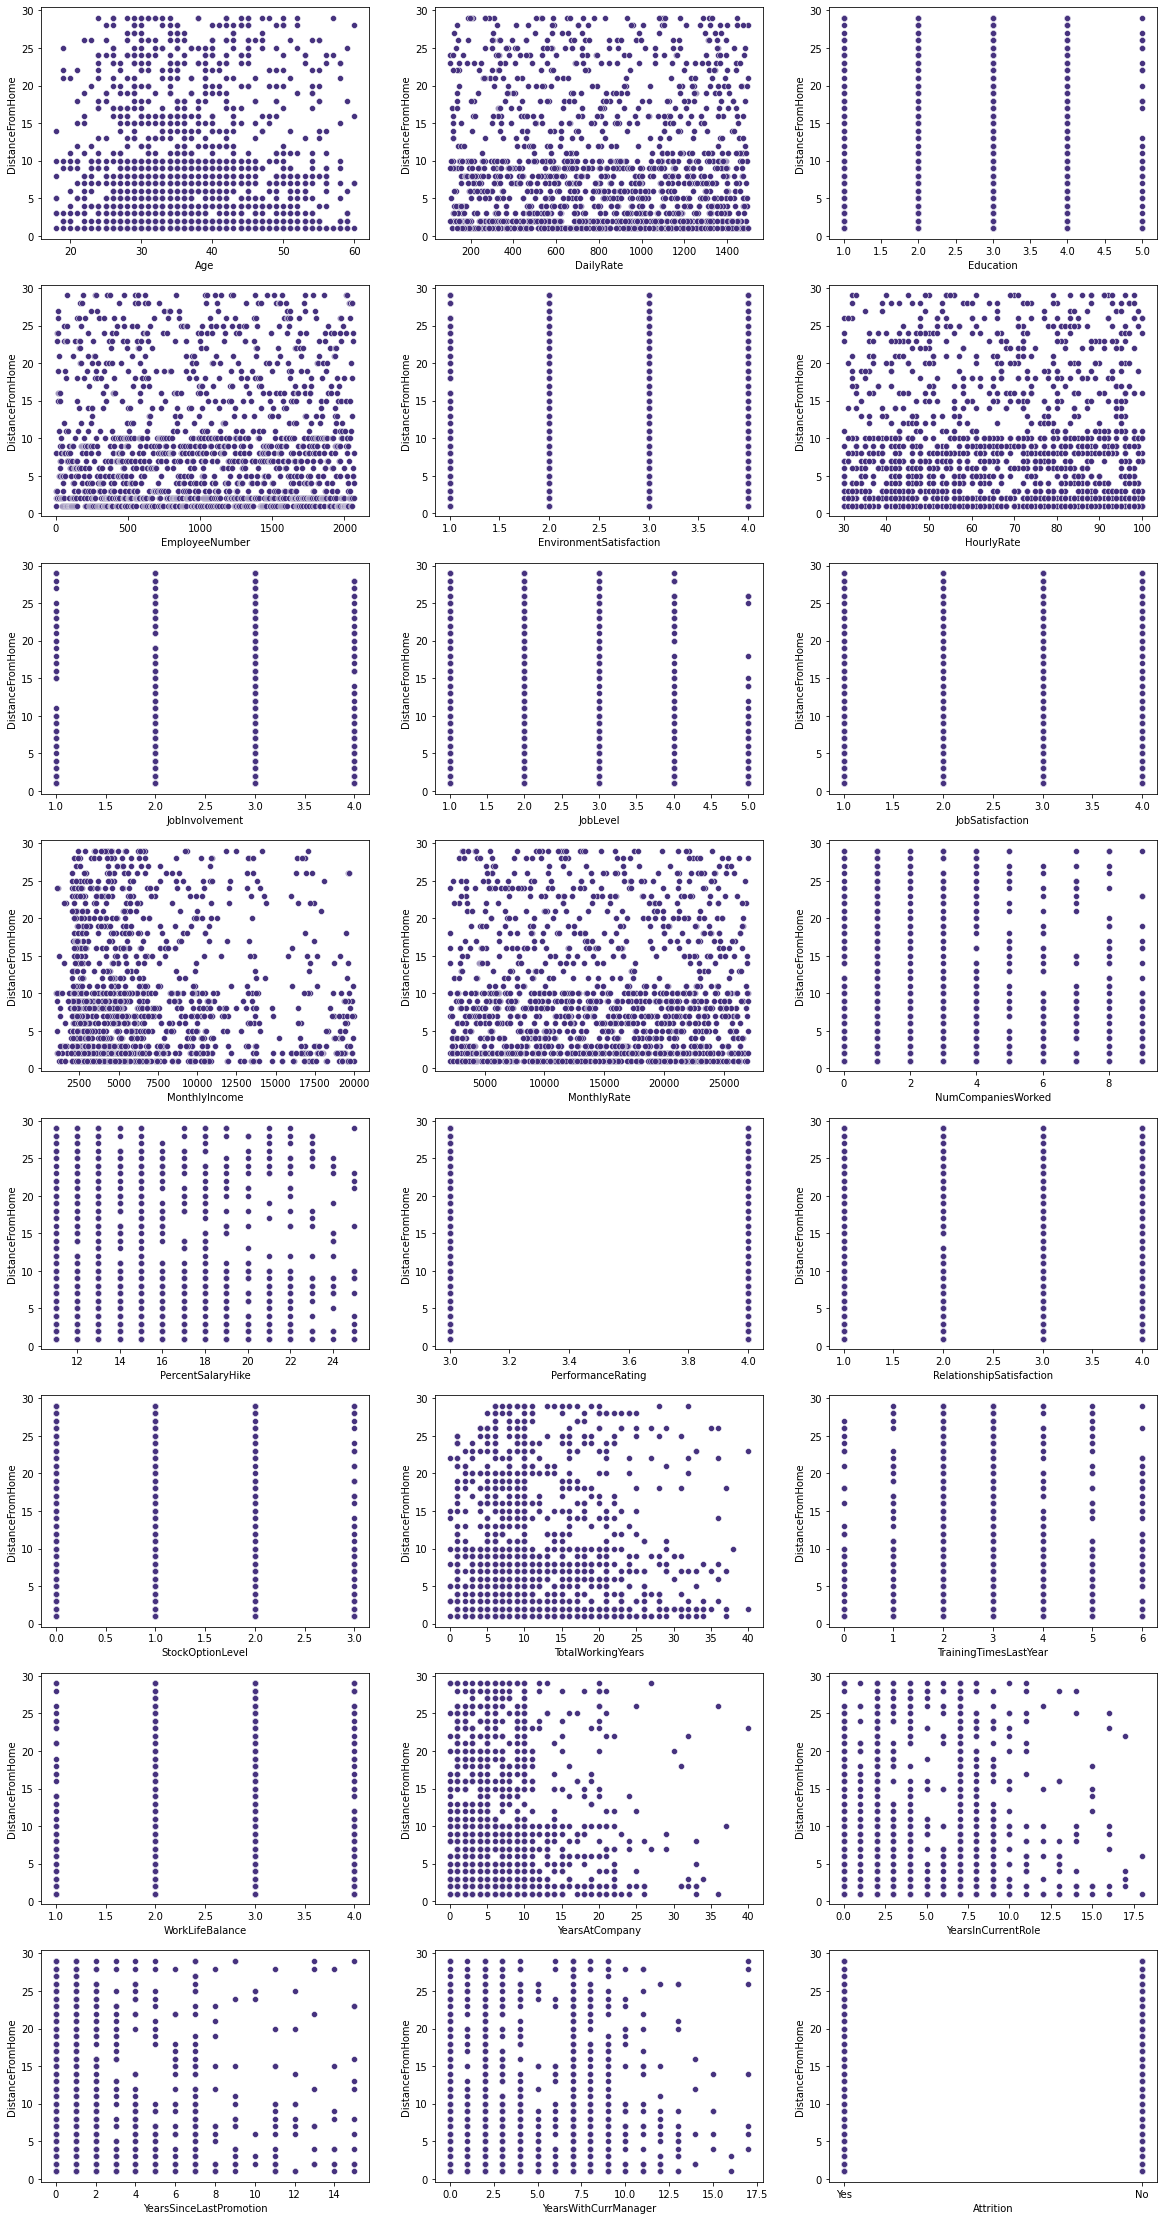

In [18]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'DistanceFromHome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'DistanceFromHome')
        x += 1


### MonthlyIncome

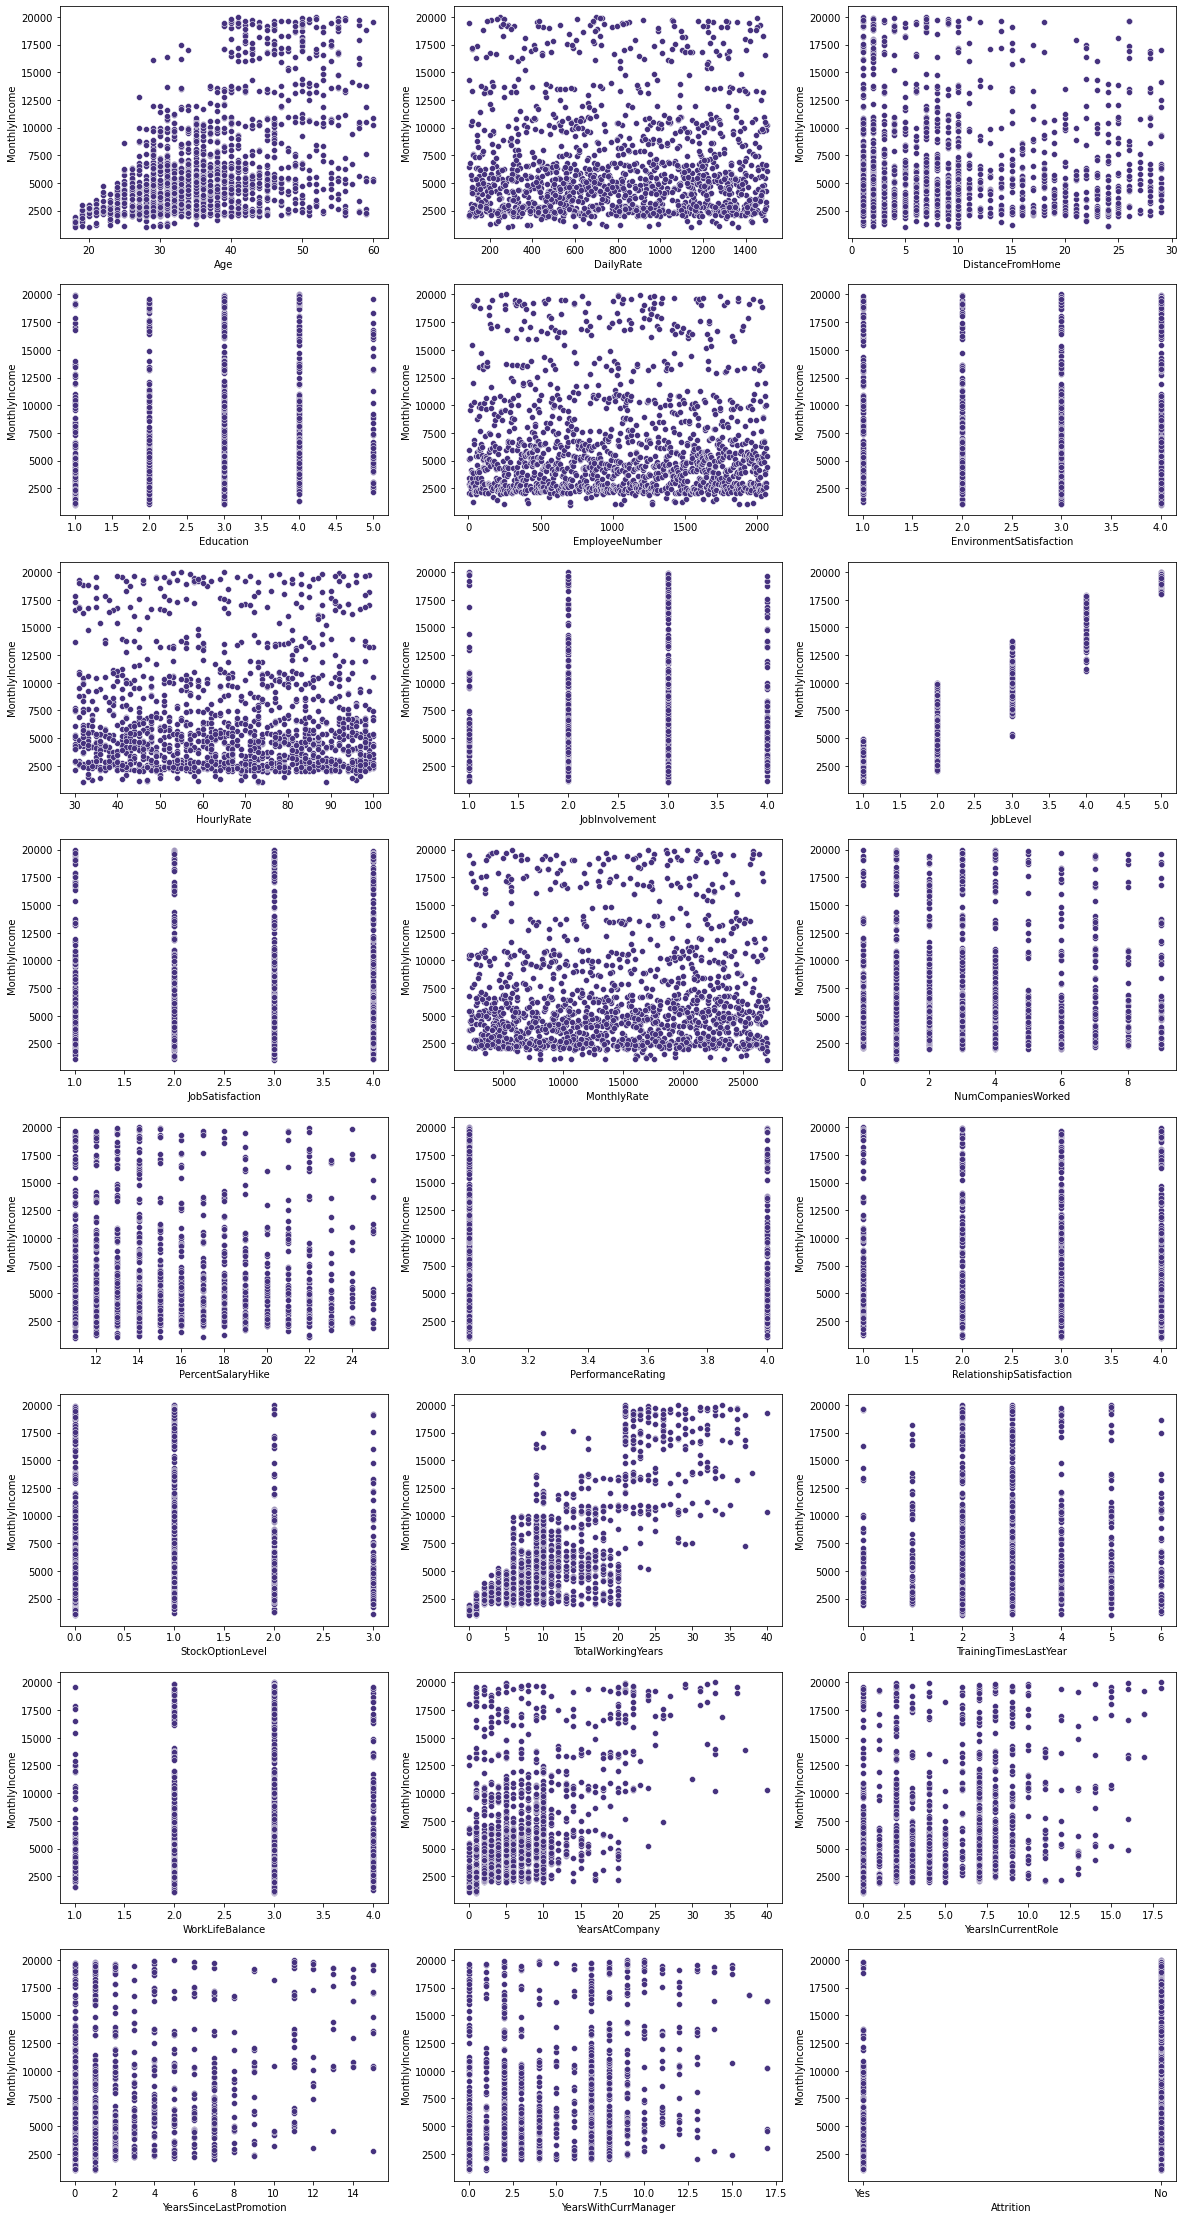

In [19]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'MonthlyIncome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'MonthlyIncome')
        x += 1


## Categorical Variables

In [20]:
# Selecting categoricla variables
cat_variables = df1.select_dtypes(exclude = ['int64', 'float64'])
cat_variables.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


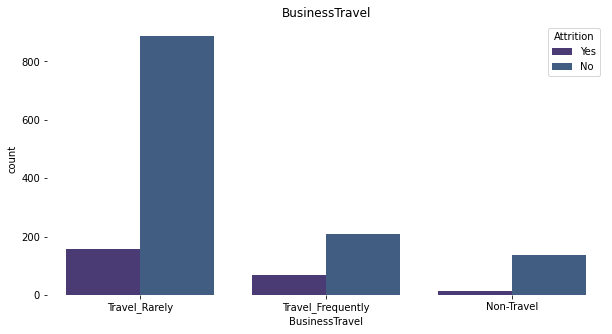

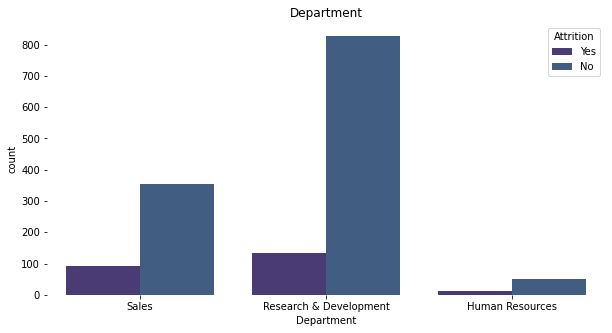

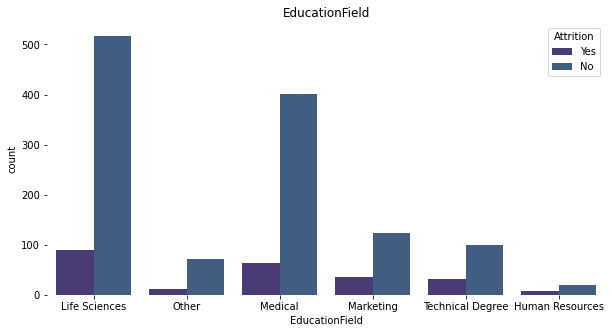

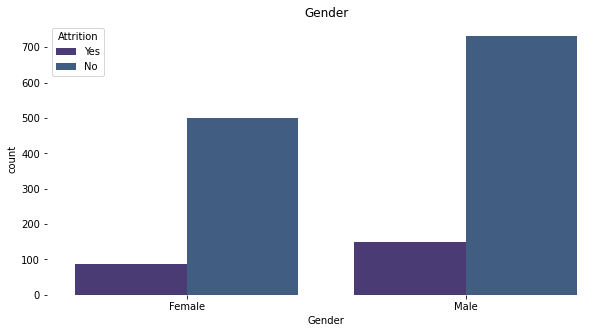

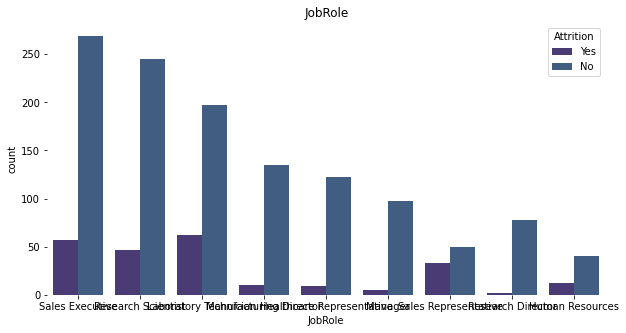

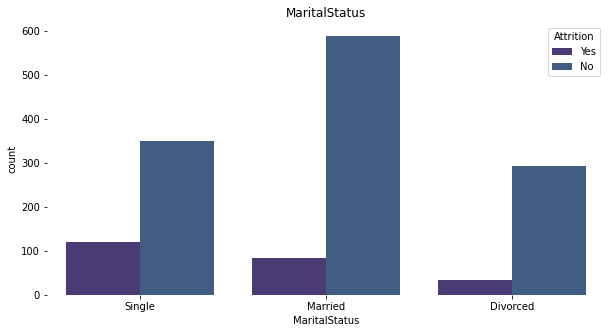

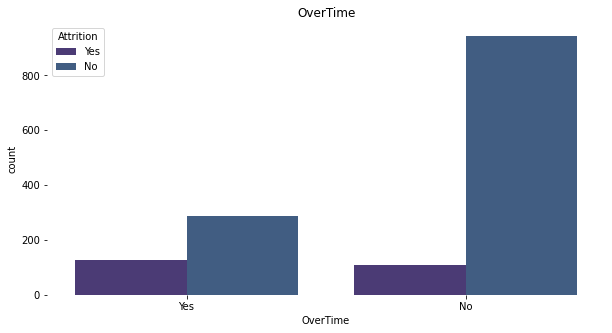

In [21]:
for d in cat_variables.columns:
    if d != 'Attrition':
        plt.figure(figsize=(10,5))
        sns.set_palette('viridis')
        sns.countplot(data = cat_variables, x = d, hue = 'Attrition')
        sns.despine(bottom = True, left = True)
        plt.title(d)

***

**1. Business Travel:**

People who travel more often have more attrition.

**2. Marital Status**

Single people quit their jobs more often.

***


## CATEGORICAL & NUMERICAL VARIABLES

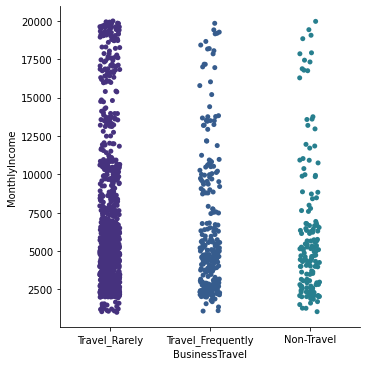

In [22]:
sns.catplot(data = df1, x = 'BusinessTravel', y = 'MonthlyIncome');

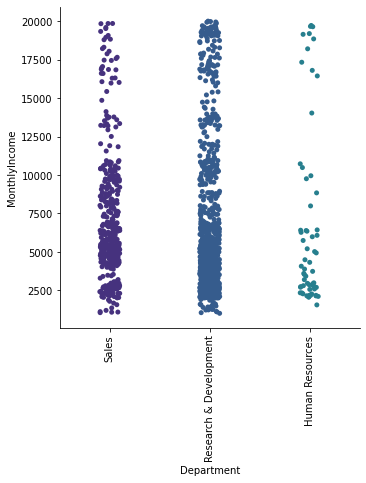

In [27]:
sns.catplot(data = df1, x = 'Department', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

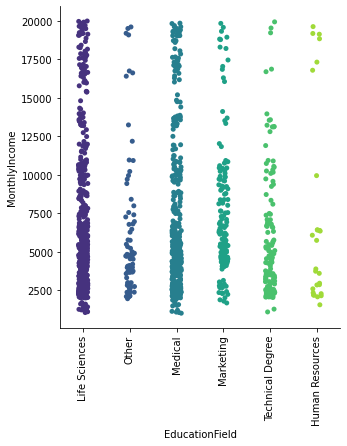

In [28]:
sns.catplot(data = df1, x = 'EducationField', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

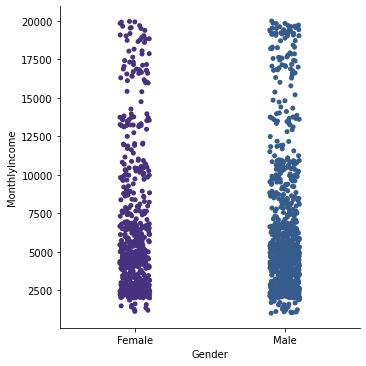

In [25]:
sns.catplot(data = df1, x = 'Gender', y = 'MonthlyIncome');

## CORRELATION

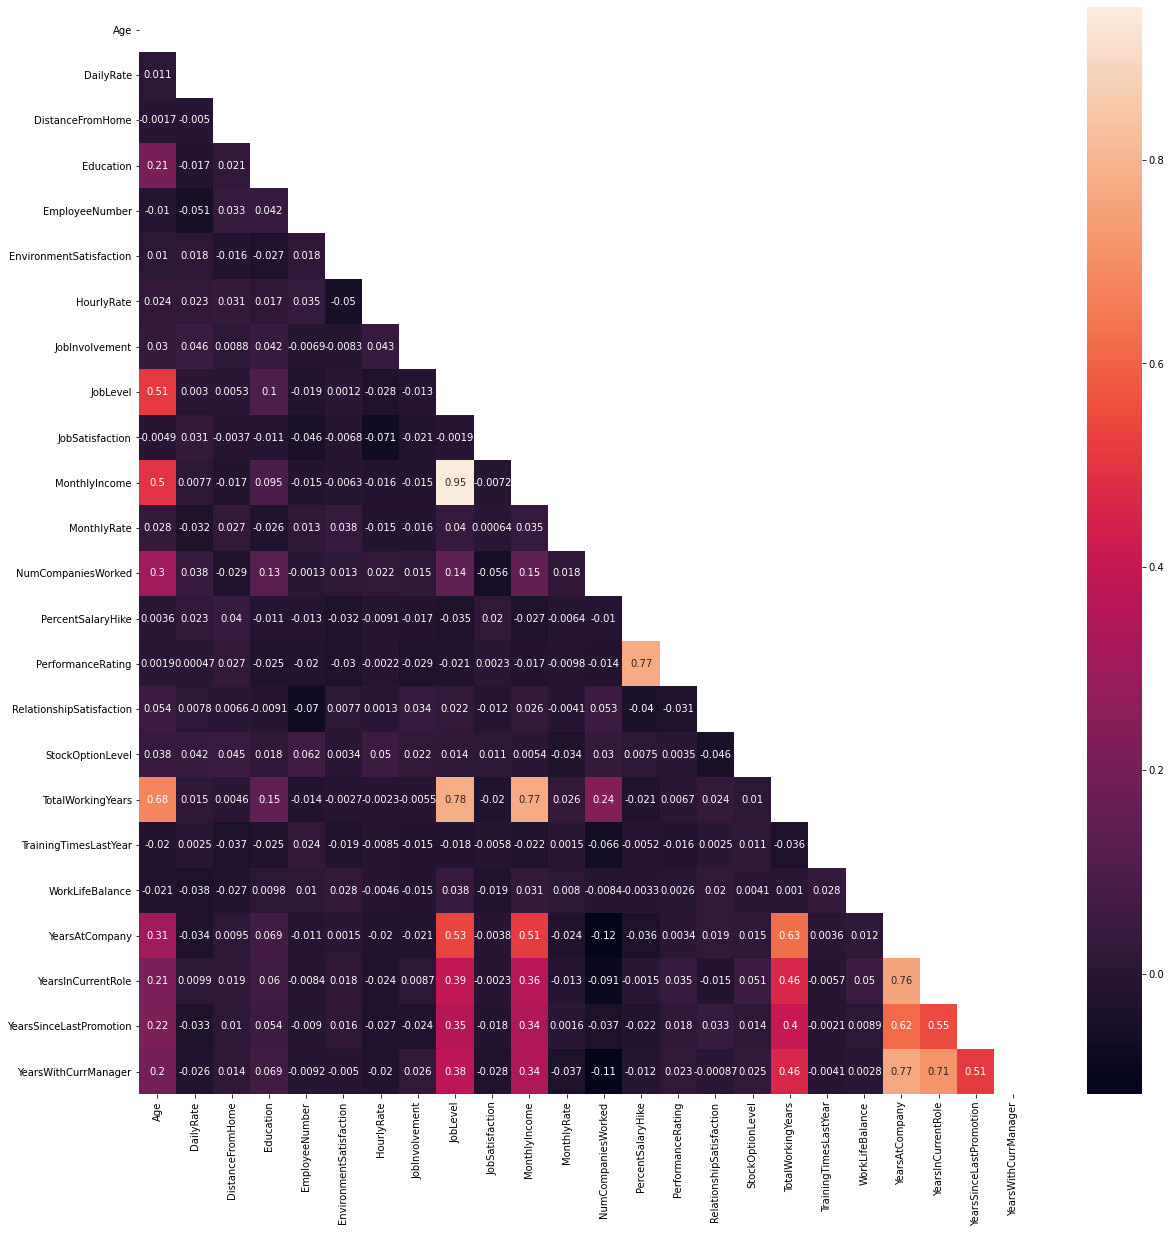

In [26]:

plt.figure(figsize= (20, 20))
sns.set_palette('viridis')
corr = num_variables.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set_palette('viridis')
sns.heatmap(corr, mask = mask, annot= True);

Strong Correlation:

- MontlyIncome x JobLevel
- JobLebel x TotalWorkingYears
- TotalWorkingYears x Age
- JobLevel x YearsAtCompany
- TotalWorkingYears x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsSinceLastPromotion x YearsWithCurrManager


# DATA PREPARATION

In [59]:
def value_counts():
    for c in cat_variables.columns:
        print(cat_variables[c].value_counts())
        print('------------\n')
        
value_counts()        

No     1233
Yes     237
Name: Attrition, dtype: int64
------------

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------

Male      882
Female    588
Name: Gender, dtype: int64
------------

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
------------

Married     673
Single      470
Divorced    327
Name: MaritalStatus, 